In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

In [15]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
#convert bunch datatype to a dataframe with only features
cancer_df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
cancer_df.shape

(569, 30)

As we know it is difficult to visualize the data with so many features i.e high dimensional data so we can use PCA to find the two principal components hence visualize the data in two-dimensional space with a single scatter plot. But, before that, we need to pre-process the data i.e we need to scale the data such that each feature has unit variance and has not a greater impact than the other one.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer_df)
print("Shape of the scaled dataframe is:",X_scaled.shape)

Shape of the scaled dataframe is: (569, 30)


## Implementing PCA

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().
We can also specify how many components we want to keep when creating the PCA object.
Here,we will specify number of components as 2

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

(569, 2)


We’ve reduced **30** dimensions to just **2!** Let’s plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

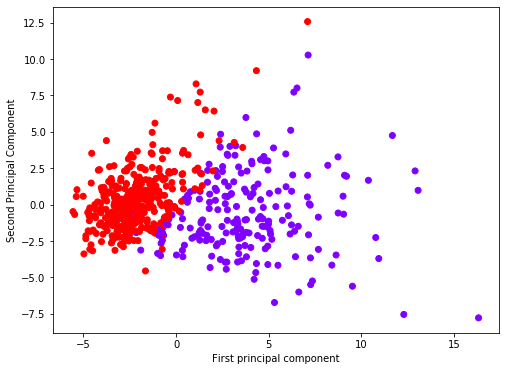

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [26]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [18]:
y = cancer.target

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y , test_size =0.3, random_state = 21)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred_pca = logreg.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_pred_pca))

Accuracy: 0.9532163742690059


## To Interpret the PCA components

In [27]:
pca.components_.shape 

(2, 30)

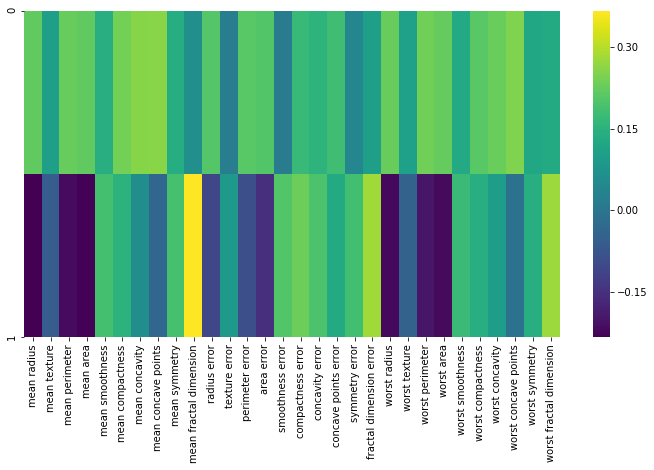

In [45]:
map= pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='viridis')

## Application of PCA 

One of the most important applications of PCA is for speeding up machine learning algorithms